<img src="https://github.com/Mr-ZOBA/A-obi/blob/main/Insur.jpg?raw=true" width="900" height="100"/>

In [33]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import f_oneway

In [4]:
data= pd.read_csv("insurance.csv") # permet de charger la base de données
data.head(10) # permet d'afficher les 10 premières lignes de notre Base de données

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


## Informations sur les variables de la base de données

In [5]:
#age: fait allusion à l'âge de la personnes
#sexe: fait allusion aux sexe de la personne
#bmi: fait allusion à l'indice de masse corporelle (IMC)
#children: fait allusion au nombre d'enfant que possède la personne et qui sont couvert par l'assurance
#smoker: fait allusion aux statut fumeur ou non 
#region: fait allusion à la region ou la personne habite 
#charge: fait allusion aux Frais médicaux individuels facturés par l'assurance maladie

### Faisons une Analyse exploratoire des données

In [6]:
data.shape #affiche les dimensions de la base en nombre de (lignes, colonne)

(1338, 7)

In [7]:
#la base de données comporte 1338 lignes et 7 colonnes

In [8]:
data.dtypes #les types des variables

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [9]:
# on remarque 2 variables de types int, 2 de type float et 3 variables qualitatives

In [10]:
data.isna().sum() # affiche le nombre de valeur null/manquante par variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [11]:
#moyenne 
#Ecart type 
#max et min 
#quartiles
#nommbre de personnes assuré

In [12]:
data.describe().T # affiche les statistiques

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [13]:
# age moyen des assurer est de 39, l'age minimum est de 18 ans et l'âge maximum est 64 ans.

In [14]:
for g in ['bmi','age','charges']:
    moyenne = data[g].mean()
    mediane = data[g].median()
    mode = data[g].mode()
    print(f'La moyenne de {g} est {round(moyenne,2)}') 
    print(f'La mediane de {g} est {mediane}')
    print(f'Le mode de {g} est {mode} \n')

La moyenne de bmi est 30.66
La mediane de bmi est 30.4
Le mode de bmi est 0    32.3
Name: bmi, dtype: float64 

La moyenne de age est 39.21
La mediane de age est 39.0
Le mode de age est 0    18
Name: age, dtype: int64 

La moyenne de charges est 13270.42
La mediane de charges est 9382.033
Le mode de charges est 0    1639.5631
Name: charges, dtype: float64 



## *IMC*
On remarque que l'IMC moyenne est de 30.66. On remarque un nombre élévé de personne qui ont une IMC=32.3. On remarque egalement que moins de 50% de la population on un IMC =30.04.
## *Age*
L'âge moyen est de 39.21, moins de 50% des personnes ont 39 ans. les personnes dont l'âge est de 18 ans sont les plus nombreux dans la base.
## *Charges* 
La charge moyenne est de 13270.42, moins de 50% des personnes ont une charge de 9382.033. Dans la base on a plus de personne dont la charge est 1639.5631

### Distribution de bmi, age,  et charges

In [15]:
data1=data.drop(["sex","children","smoker","region"], axis=1) #extration des variables age, bmi et charges

In [16]:
data1

,age,bmi,charges
0,19,27.900,16884.92400
1,18,33.770,1725.55230
2,28,33.000,4449.46200
3,33,22.705,21984.47061
4,32,28.880,3866.85520
...,...,...,...
1333,50,30.970,10600.54830
1334,18,31.920,2205.98080
1335,18,36.850,1629.83350
1336,21,25.800,2007.94500


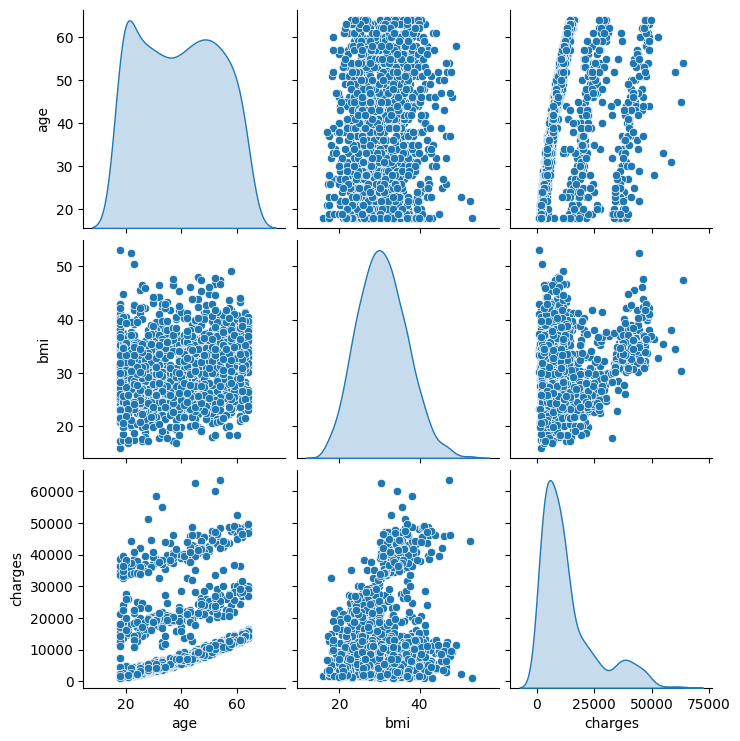

In [17]:
sns.pairplot(data1, diag_kind='kde')

In [18]:
# la distribution de la variable bmi semble suivre une celle de la loi normale 
# la distribution de la variable âge semble Uniforme
# la variable charges est fortement asymetrique avec une tendance à gauche

In [19]:
from scipy import stats

### L'expression CA ci-dessous designe le coefficient d'assymetrie

In [20]:
CA_age = data['age'].skew()
CA_bmi = data['bmi'].skew()
CA_charges =data['charges'].skew()
## Affichons le coefficient d'assymetrie
print("le coefficient d'assymetrie age est", CA_age)
print("le coefficient d'assymetrie bmi est", CA_bmi)
print("le coefficient d'assymetrie charges est", CA_charges)

le coefficient d'assymetrie age est 0.05567251565299186
le coefficient d'assymetrie bmi est 0.2840471105987448
le coefficient d'assymetrie charges est 1.5158796580240388


Intervalle inter-quartile IQR de bmi est: 8.3975
Le nombre de valeur aberante de la variable bmi est 9


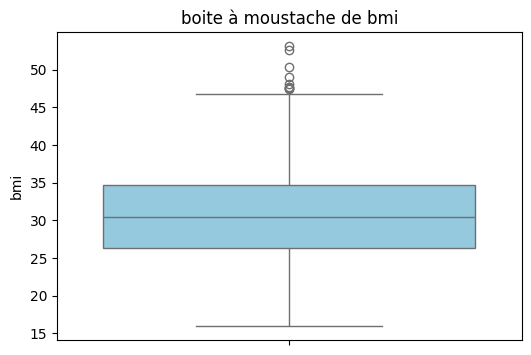

Intervalle inter-quartile IQR de age est: 24.0
Le nombre de valeur aberante de la variable age est 0


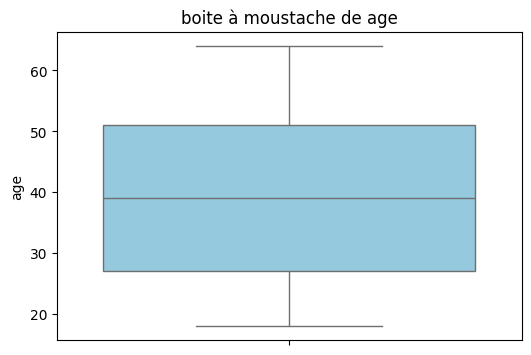

Intervalle inter-quartile IQR de charges est: 11899.625365
Le nombre de valeur aberante de la variable charges est 139


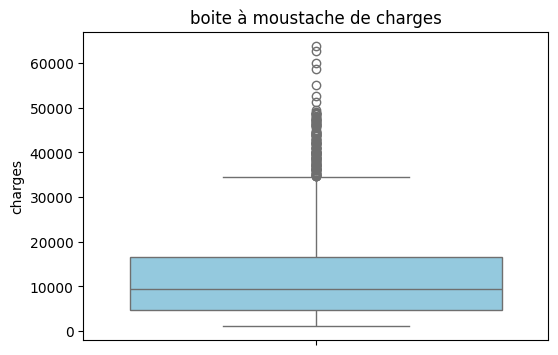

In [21]:
# Analysons le comportement des valeurs aberantes
for k in ['bmi', 'age', 'charges']: 
    plt.figure(figsize=(6,4))
    sns.boxplot(data[k], color='skyblue')
    Q1_k = data[k].quantile(0.25)
    Q3_k = data[k].quantile(0.75)
    IQR_k = Q3_k-Q1_k
    Nb_k = (data[k]<(Q1_k-1.5*IQR_k)) | (data[k]>(Q3_k + 1.5*IQR_k))
    print(f'Intervalle inter-quartile IQR de {k} est: {IQR_k}')
    print(f'Le nombre de valeur aberante de la variable {k} est {Nb_k.sum()}')
    plt.title(f'boite à moustache de {k}')
    plt.show()

La variable charges presente plus de valeurs aberances.cela à tendance à entrainer un biais dans le calcul de la 
moyennes. On aura une moyenne des charges qui ne reflete pas la réalite parceque ces valeurs aberantes vont le tirer vers le haut.
Cela pourrait avoir un impact sur le modèle. Egalement au niveau de l'indice de masse corporelle(IMC), on observe des personnes qui ont un poids qui est très élévé et qui impact négativement le calcul de la moyennne.

#### Analysons la distribution des variables variables qualitative. nous allons également prendre la variable children qui n'est pas qualitative

affichons les distribution sex
male      676
female    662
Name: count, dtype: int64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16324\961197656.py:4: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.barplot(x=dat_i.index, y=dat_i.values, hue=dat_i.index, palette=couleur)


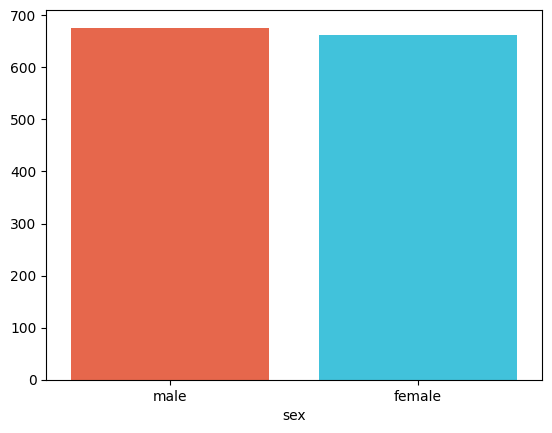

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16324\961197656.py:4: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.barplot(x=dat_i.index, y=dat_i.values, hue=dat_i.index, palette=couleur)


affichons les distribution smoker
no     1064
yes     274
Name: count, dtype: int64


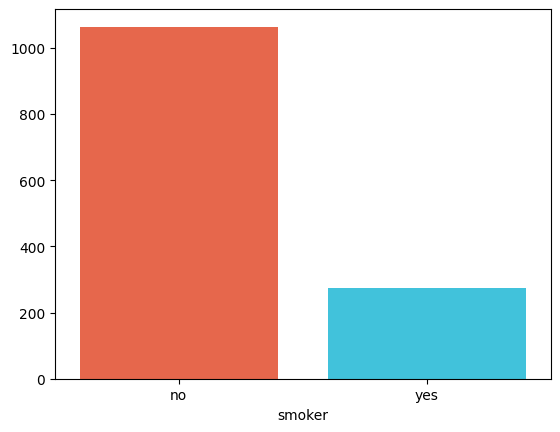

affichons les distribution region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16324\961197656.py:4: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.barplot(x=dat_i.index, y=dat_i.values, hue=dat_i.index, palette=couleur)


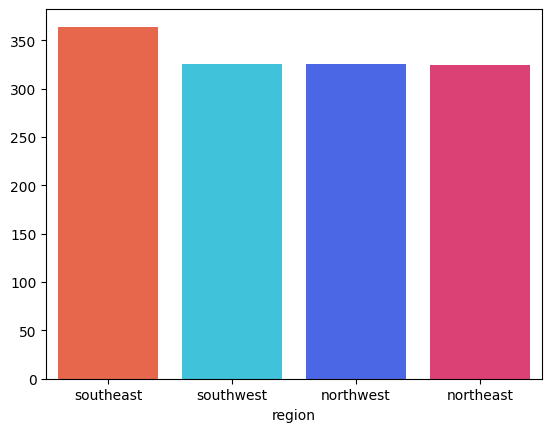

affichons les distribution children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64


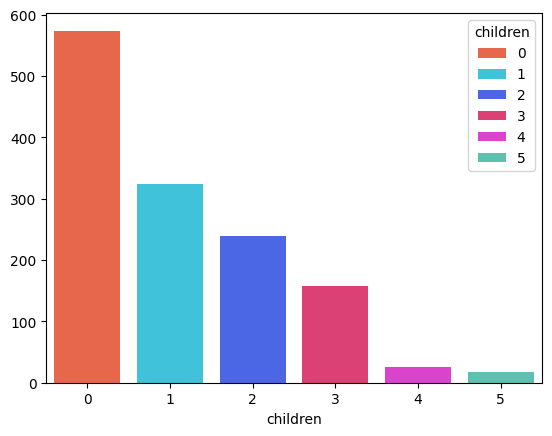

In [22]:
couleur = ['#FF5733', '#27D3F5', '#3357FF', '#F5276C','#F42AE0','#4DD1BB']
for i in ['sex','smoker','region','children']:
    dat_i = data[i].value_counts()
    sns.barplot(x=dat_i.index, y=dat_i.values, hue=dat_i.index, palette=couleur)
    print(f'affichons les distribution {dat_i}')
    plt.show()

#### 

Pour la variable children on a plus d'enfants de moins d'un an. Il y'a plus de personnes ayant une assurance maladie dans la region du sud-est. il y'a plus de femmes que d'hommes assuré

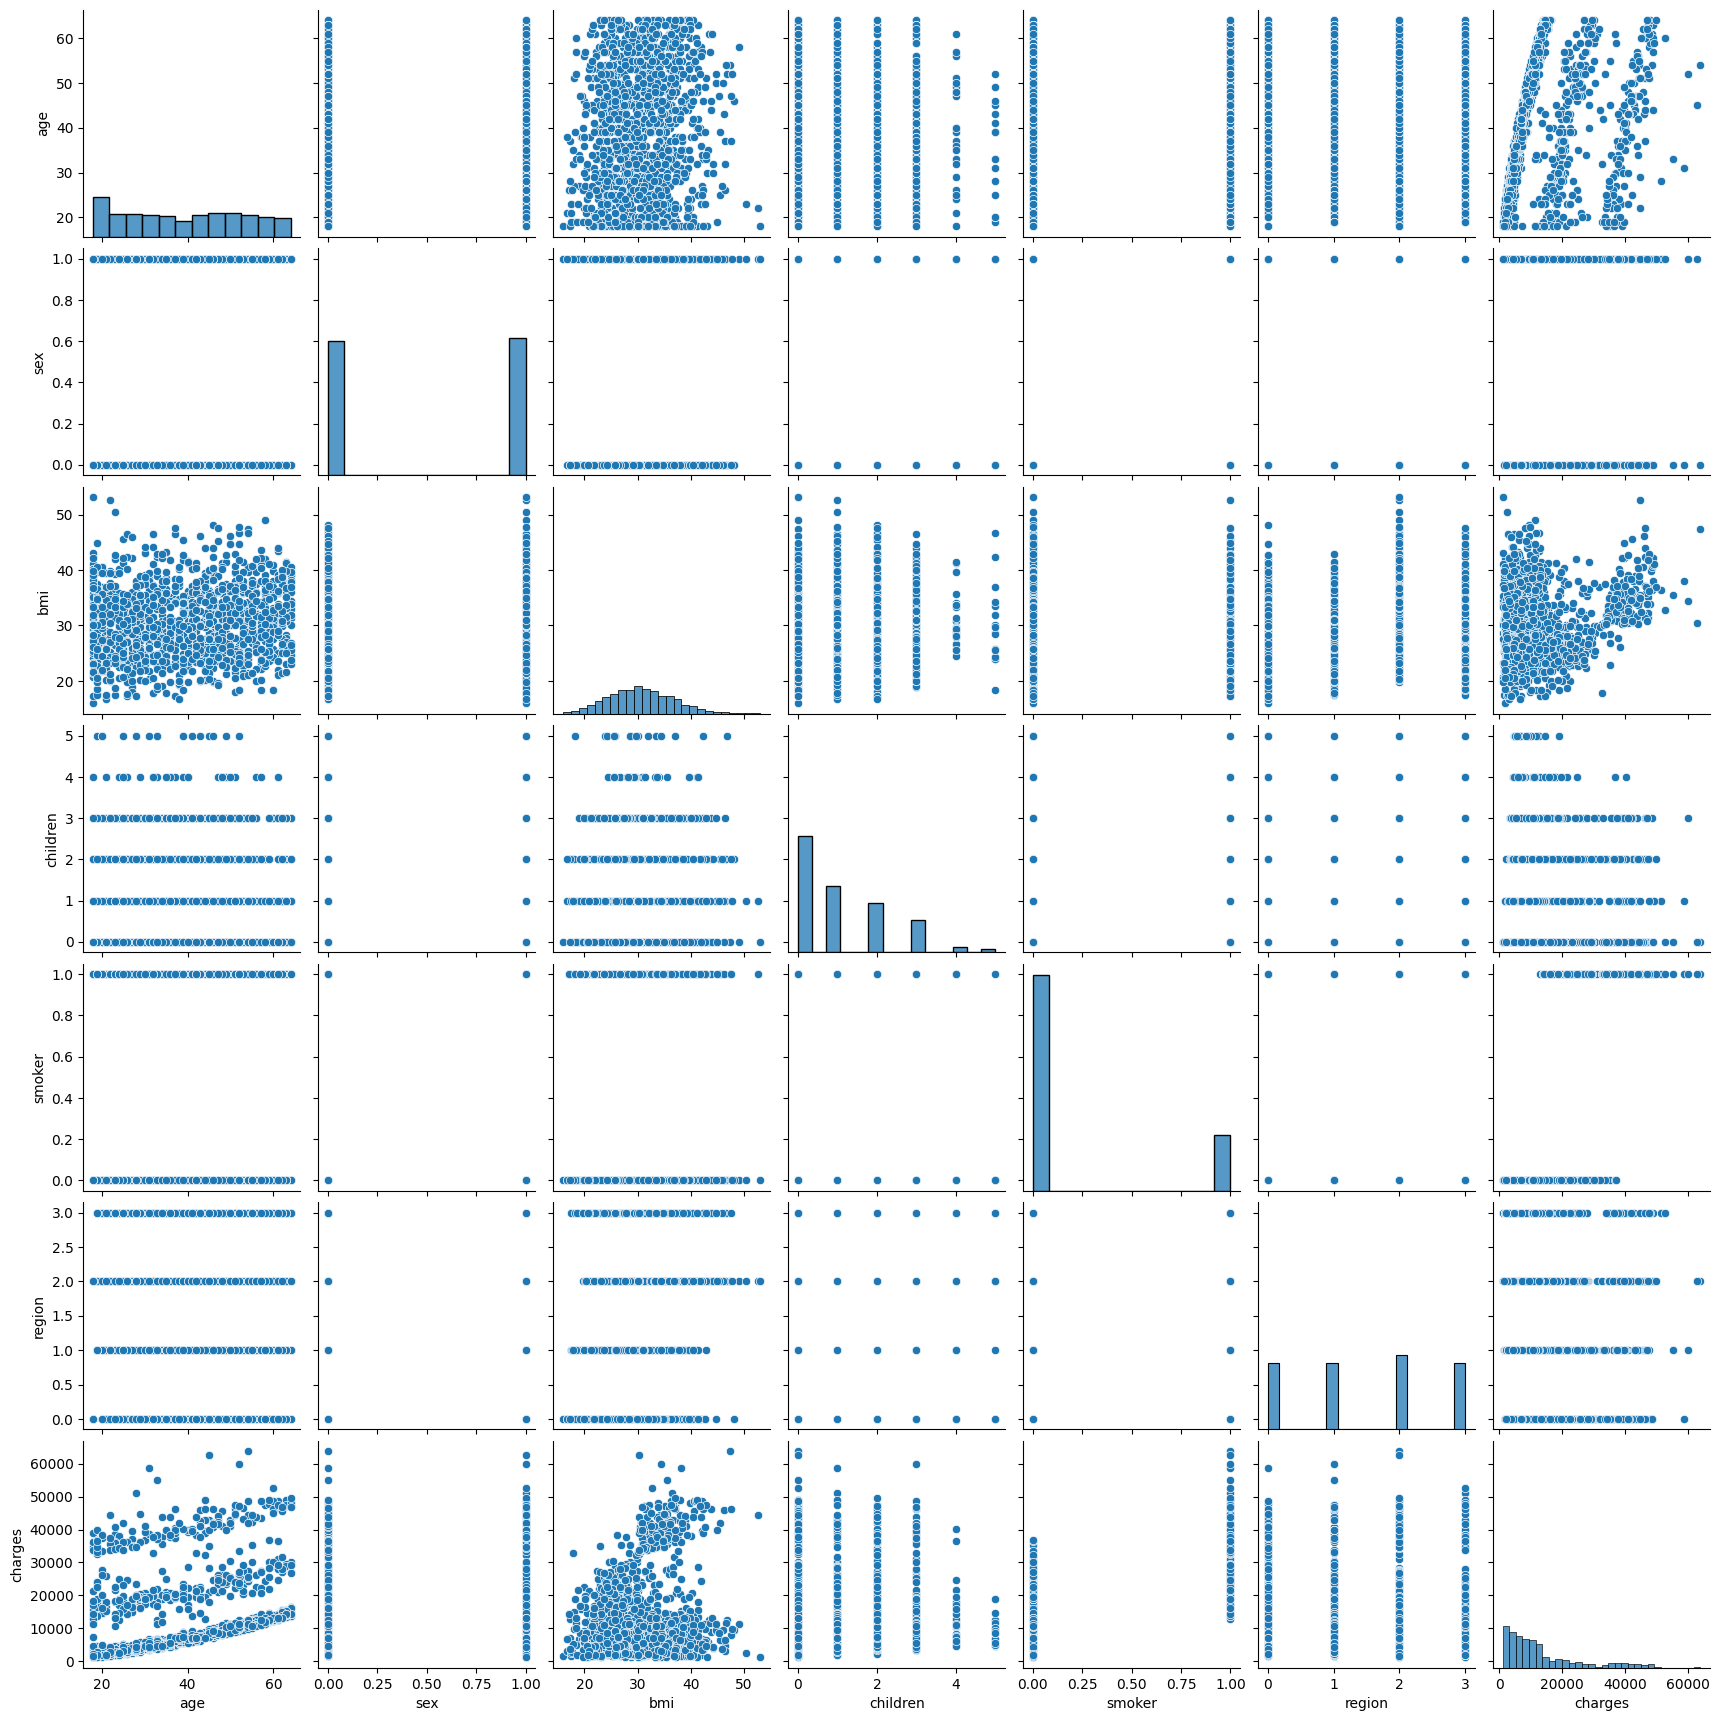

In [23]:
# Créeons une copy de la base. cette copy est utile dans la mesure ou il faut passe par un recodage
datak = data.copy()
# A partir du package sklearn lLabelEncoder recodons les variables qualitatives
datak.loc[:,['sex','smoker','region']] = datak.loc[:,['sex','smoker','region']].apply(LabelEncoder().fit_transform)
sns.pairplot(datak)
plt.show()

#### **Les charges des fumeurs diffèrent-ils considérablement de ceux des non-fumeurs. pour se faire nous alons nous interesse à la variable smoker et charges**

#### Posons les hypothèses
Ho: La charge des gens qui fument ne diffèrent pas significativement de ceux des non fumeurs.  
Ha: La charge des gens qui fument diffèrent significativement de ceux des non fumeurs.

In [24]:
# faisons une extraction des fumeur et non fumeur selon la variable charge. le ttest permet de voir la difference entre deux moyennes
nonfumeur=data[data['smoker']=='yes']['charges']
fumeur=data[data['smoker']=='no']['charges']
t_stats, pval = stats.ttest_ind(fumeur,nonfumeur, axis = 0)
print(f'\nla valeur obtenu par le test de ttest est: {t_stats}')
print(f'\nla pvalue est: {pval}\n')
# Interpretations 
if pval < 0.05:
    print(f'pour une pvalue de {round(pval,4)}, la difference est significative, On rejette l\'hypothèse null')
    print('La charge des gens qui fument diffèrent significativement de ceux des non fumeurs')
else:
    print(f'pour une pvalue de {round(pval,4)} la difference n\'est pas significative, On ne peut donc pas rejette l\'hypothèse null')
    print('La charge des gens qui fument ne diffèrent pas significativement de ceux des non fumeurs')



la valeur obtenu par le test de ttest est: -46.66492117272371

la pvalue est: 8.271435842179102e-283

pour une pvalue de 0.0, la difference est significative, On rejette l'hypothèse null
La charge des gens qui fument diffèrent significativement de ceux des non fumeurs


### Visualisons le graphique

Text(0, 0.5, 'LES CHARGES')

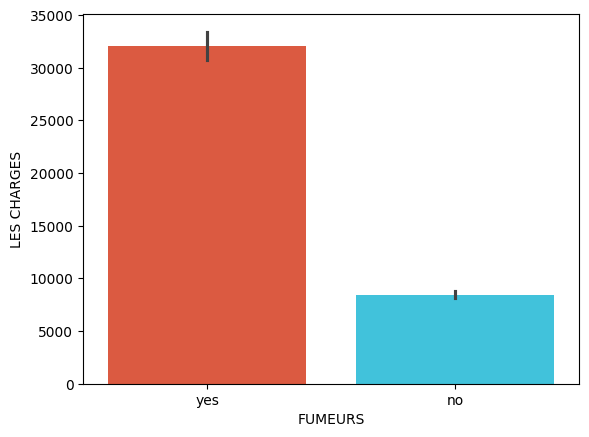

In [25]:
cols=['#F54927','#27D3F5']
sns.barplot(data=data, x='smoker', y='charges', hue='smoker', palette=cols)
plt.xlabel('FUMEURS')
plt.ylabel('LES CHARGES')

Le ttest accompagné de la visualisation montre que la charge des gens qui fument diffèrent significativement de ceux des non fumeurs.

#### **L'indice de masse corporelle des hommes diffère t'il significativement de celui des femmes**

#### Posons les hypothèses
Ho: L'IMC des hommes ne diffèrent pas significativement de ceux des femmes.  
Ha: L'IMC des hommes diffèrent significativement de ceux des femmes.

In [26]:
# IMC selon le sexe
IMC_M = data[data['sex']=='male']['bmi']
IMC_F = data[data['sex']=='female']['bmi']

imc_stat, pval_IMC = stats.ttest_ind(IMC_M,IMC_F)
print(f'\nLe test donne une valeur de {imc_stat}')
print(f'La pvalue est {pval_IMC}\n')

if pval_IMC < 0.05:
    print(f'pour une pvalue de {round(pval_IMC,4)}, la difference est significative, On rejette l\'hypothèse null')
    print(f'L\'IMC des hommes diffèrent significativement de ceux des femmes.')
else:
    print(f'pour une pvalue de {round(pval_IMC,4)} la difference n\'est pas significative, On ne peut donc pas rejette l\'hypothèse null')
    print(f'L\'IMC des hommes ne diffèrent pas significativement de ceux des femmes.')


Le test donne une valeur de 1.696752635752224
La pvalue est 0.08997637178984934

pour une pvalue de 0.09 la difference n'est pas significative, On ne peut donc pas rejette l'hypothèse null
L'IMC des hommes ne diffèrent pas significativement de ceux des femmes.


#### Representation graphique

Text(0.5, 1.0, "Sexe en fonction de l'indice de masse corporelle")

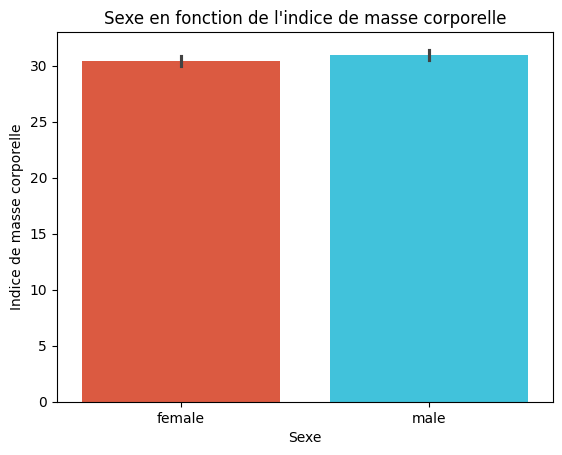

In [27]:
sns.barplot(data=data, x='sex', y='bmi',hue='sex', palette=cols)
plt.xlabel('Sexe')
plt.ylabel('Indice de masse corporelle')
plt.title(f'Sexe en fonction de l\'indice de masse corporelle')

En se basant sur les conclusions du test et du graphique ci-dessus, il est claire qu'on ne peut pas dire qu'il existe une difference significative entre l'imc des hommes et celui des femmes.

#### **La proportion de fumeurs diffère-t-elle de manière significative selon le sexe ?**

#### **Hypothèses**
Ho: La proportion de fumeurs ne diffèrent pas significativement selon le sexe.  
Ha: La proportion de fumeurs diffèrent significativement selon le sexe.

In [28]:
#Créons un ensemble de données fictif.
fictif_data = pd.get_dummies(data, prefix='smoke', columns=['smoker'])
fictif_data

,age,sex,bmi,children,region,charges,smoke_no,smoke_yes
0,19,female,27.900,0,southwest,16884.92400,False,True
1,18,male,33.770,1,southeast,1725.55230,True,False
2,28,male,33.000,3,southeast,4449.46200,True,False
3,33,male,22.705,0,northwest,21984.47061,True,False
4,32,male,28.880,0,northwest,3866.85520,True,False
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,northwest,10600.54830,True,False
1334,18,female,31.920,0,northeast,2205.98080,True,False
1335,18,female,36.850,0,southeast,1629.83350,True,False
1336,21,female,25.800,0,southwest,2007.94500,True,False


In [30]:
#Nombre d'hommes fumeurs
Nb_MalFum = data[data['sex']=='male']['smoker'].count()
#Nombre de femmes fumeurs
Nb_FemFum = data[data['sex']=='female']['smoker'].count()
#Interessons nous à la variable smoker
#Nombre d'hommes fumeurs de la base fictive
fictif_MalFum = fictif_data[data['sex']=='male']['smoke_yes'].sum()
#Nombre de femmes fumeurs de la base fictive
fictif_FemFum = fictif_data[data['sex']=='female']['smoke_yes'].sum()

#Le test Z de proportion sert à déterminer si la différence observée entre les 
#proportions de deux échantillons indépendants est statistiquement significative, 
#c'est-à-dire si elle est trop importante pour être attribuée au hasard.

prop, pval_z = proportions_ztest([fictif_MalFum, fictif_FemFum], [Nb_MalFum, Nb_FemFum])
print(f'la proportion z estimer est {prop}')
print(f'la pvalue obtenu est {pval}\n')

if pval_z < 0.05:
    print(f'pour une pvalue de {round(pval_z,4)}, la difference est significative, On rejette l\'hypothèse null')
    print('La proportion de fumeurs diffèrent significativement selon le sexe.')
else:
    print(f'pour une pvalue de {round(pval_z,4)} la difference n\'est pas significative, On ne peut donc pas rejette l\'hypothèse null')
    print('La proportion de fumeurs ne diffèrent pas significativement selon le sexe.')


la proportion z estimer est 2.7867402154855503
la pvalue obtenu est 8.271435842179102e-283

pour une pvalue de 0.0053, la difference est significative, On rejette l'hypothèse null
La proportion de fumeurs diffèrent significativement selon le sexe.


<Axes: xlabel='sex', ylabel='smoke_yes'>

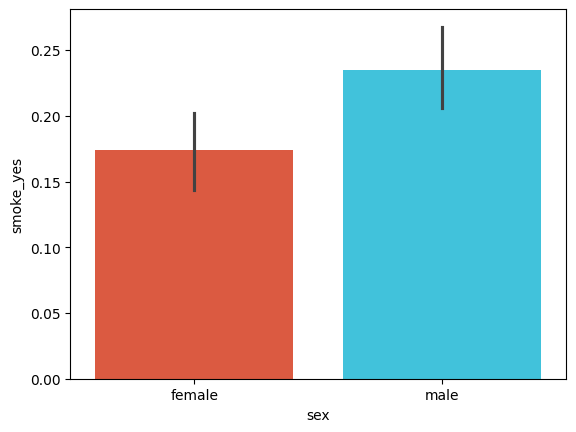

In [32]:
sns.barplot(fictif_data, x='sex', y='smoke_yes', hue='sex', palette=cols)

l'analyse du graphique et le test nous permet de voir que la proportion de fumeur diffère de la proportion de fumeuses.

#### **La répartition de l'IMC est-elle la même chez les femmes sans enfant, chez celles qui ont un enfant et chez celles qui ont deux enfants ?**

#### **Hypothèses**
Ho: Distribution de l'IMC chez les femmes sans enfant, chez celles qui ont un enfant et chez celles qui ont deux enfants sont les mêmes.  
H1: Distribution de l'IMC chez les femmes sans enfant, chez celles qui ont un enfant et chez celles qui ont deux enfants ne sont pas les même

In [46]:
# extraction imc femmes sans enfants
IMC_FSE0=data[(data['children']==0) & (data['sex']=='female')]['bmi']
IMC_FSE1=data[(data['children']==1) & (data['sex']=='female')]['bmi']
IMC_FSE2=data[(data['children']==2) & (data['sex']=='female')]['bmi']

#lancons un test de fisher F-test
F_IMC_FSE, pval_IMCSE = f_oneway(IMC_FSE0, IMC_FSE1, IMC_FSE2)
print(f'F_test estimer est {F_IMC_FSE}')
print(f'la pvalue obtenu est {pval_IMCSE}\n')

if pval_IMCSE < 0.05:
    print(f'pour une pvalue de {round(pval_IMCSE,4)}, la difference est significative, On rejette l\'hypothèse null')
    print(f'La distribution de l\'IMC chez les femmes sans enfant, chez celles qui ont un enfant et chez celles qui ont deux enfants ne sont pas les même')
else:
    print(f'pour une pvalue de {round(pval_IMCSE,4)} la difference n\'est pas significative, On ne peut donc pas rejette l\'hypothèse null')
    print(f'Distribution de l\'IMC chez les femmes sans enfant, chez celles qui ont un enfant et chez celles qui ont deux enfants sont les mêmes.')


F_test estimer est 0.3344720147757968
la pvalue obtenu est 0.7158579926754841

pour une pvalue de 0.7159 la difference n'est pas significative, On ne peut donc pas rejette l'hypothèse null
Distribution de l'IMC chez les femmes sans enfant, chez celles qui ont un enfant et chez celles qui ont deux enfants sont les mêmes.


#### Analyse graphiques de la distribution

<Axes: xlabel='children', ylabel='bmi'>

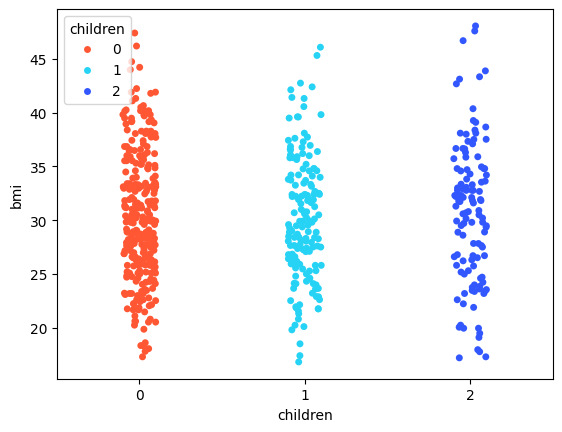

In [64]:
coul = ['#FF5733', '#27D3F5', '#3357FF']
grph=data[(data['children'].isin([0, 1, 2])) & (data['sex']=='female')]
sns.stripplot(x='children', y='bmi', data=grph,hue='children', palette=coul)

#### la distribution de l'IMC des femmes selon le nombre d'enfant semble selon le graphique avoir la même distribution